In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from emnist import extract_training_samples, extract_test_samples
import matplotlib.pyplot as plt
import numpy as np

print("Loading EMNIST data...")
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.transpose(x_train, (0, 2, 1))
x_test = np.transpose(x_test, (0, 2, 1))

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = y_train - 1
y_test = y_test - 1

print(f"Data ready! Train shape: {x_train.shape}, Test shape: {x_test.shape}")

Loading EMNIST data...
Data ready! Train shape: (124800, 28, 28, 1), Test shape: (20800, 28, 28, 1)


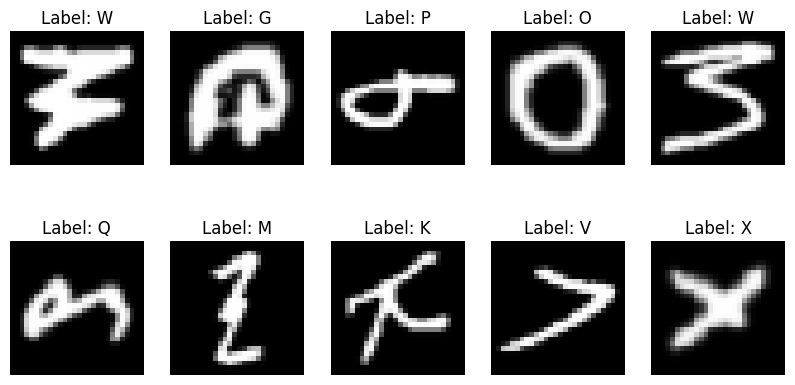

In [ ]:
class_names = [chr(i + 65) for i in range(26)]

def get_label_name(index):
    return class_names[index]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {get_label_name(y_train[i])}")
    plt.axis('off')
plt.show()

In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,610 (951.60 KB)

 Trainable params: 243,610 (951.60 KB)

 Non-trainable params: 0 (0.00 B)

Loading EMNIST data...
Fixing rotation...


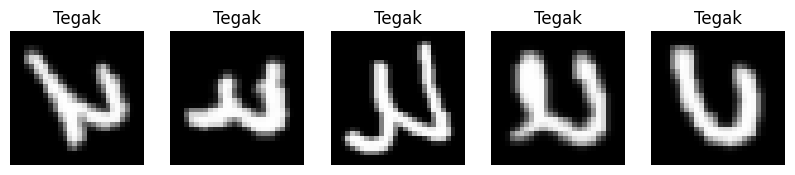

Training started...
Epoch 1/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - accuracy: 0.8534 - loss: 0.4776 - val_accuracy: 0.7208 - val_loss: 0.9106 - learning_rate: 0.0010
Epoch 2/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.9241 - loss: 0.2290 - val_accuracy: 0.9313 - val_loss: 0.2046 - learning_rate: 0.0010
Epoch 3/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9357 - loss: 0.1887 - val_accuracy: 0.9342 - val_loss: 0.1966 - learning_rate: 0.0010
Epoch 4/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 43s 88ms/step - accuracy: 0.9419 - loss: 0.1673 - val_accuracy: 0.9399 - val_loss: 0.1765 - learning_rate: 0.0010
Epoch 5/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9452 - loss: 0.1517 - val_accuracy: 0.9378 - val_loss: 0.1885 - learning_rate: 0.0010
Epoch 6/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.9495 - loss: 0.1384 - val_accuracy: 0.9405 - val_loss: 0.1855 - learning_rate: 0.0010
Epoch 7/20
488/488 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - 

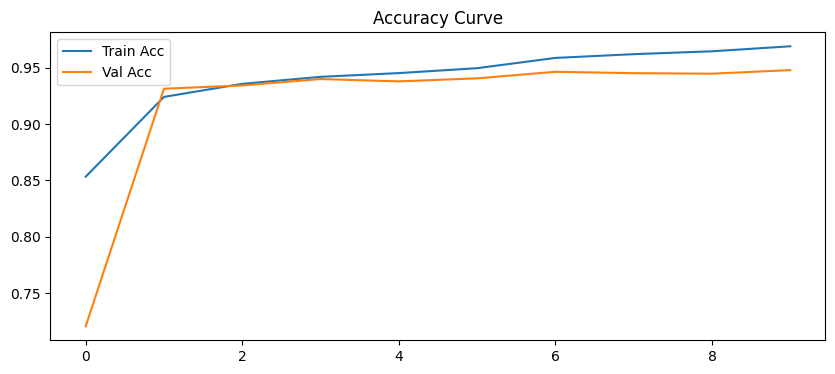

Generating confusion matrix...
650/650 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


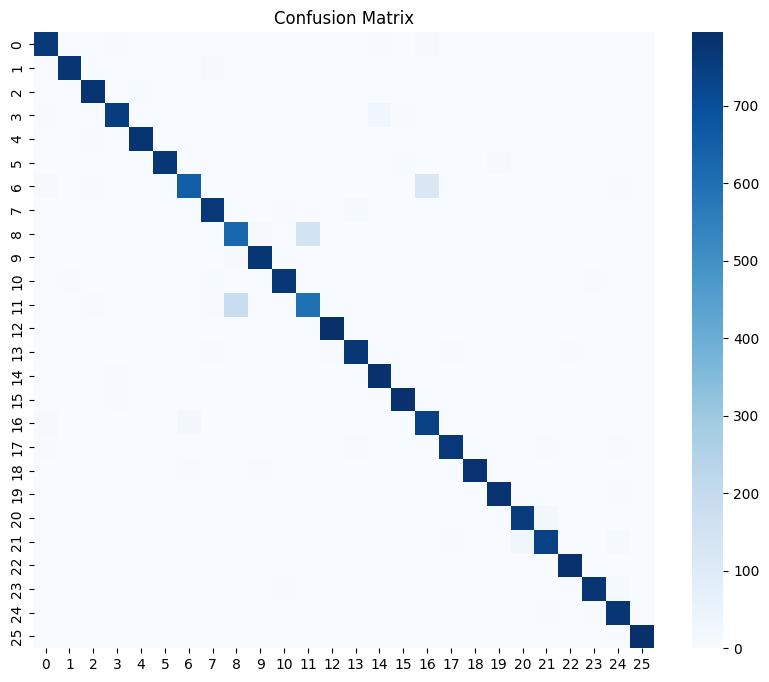

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from emnist import extract_training_samples, extract_test_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Loading EMNIST data...")
x_train, y_train = extract_training_samples("letters")
x_test, y_test = extract_test_samples("letters")

x_train = x_train / 255.0
x_test = x_test / 255.0

print("Fixing rotation...")
x_train = np.rot90(x_train, k=0, axes=(1, 2))
x_test = np.rot90(x_test, k=0, axes=(1, 2))

x_train = np.flip(x_train, axis=2)
x_test = np.flip(x_test, axis=2)

plt.figure(figsize=(10, 2))
for i in range(5):
    idxs = np.where(y_train == 21)[0]
    img = x_train[idxs[i]]
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title("Tegak")
    plt.axis("off")
plt.show()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = y_train - 1
y_test = y_test - 1

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(26, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=2, min_lr=1e-5)
]

print("Training started...")
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)
print("Training finished!")

plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

print("Generating confusion matrix...")
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

--- Top 3 Predictions ---
U: 99.51%
V: 0.48%
J: 0.01%


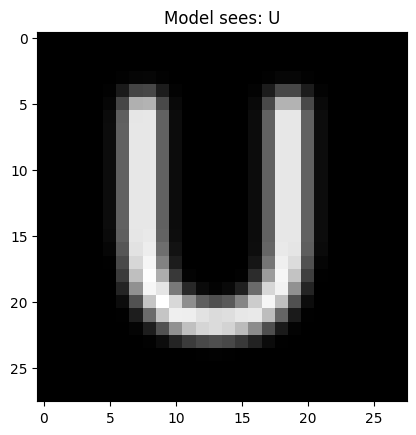

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_letter_final(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None: return print("Image not found")

    _, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    n_white = np.sum(img_binary == 255)
    if n_white > img_binary.size / 2:
        img_binary = cv2.bitwise_not(img_binary)
    
    img = img_binary 

    coords = cv2.findNonZero(img)
    x, y, w, h = cv2.boundingRect(coords)
    
    pad = 5
    h_img, w_img = img.shape
    y_start = max(0, y-pad)
    y_end = min(h_img, y+h+pad)
    x_start = max(0, x-pad)
    x_end = min(w_img, x+w+pad)
    
    crop = img[y_start:y_end, x_start:x_end]
    
    max_dim = max(crop.shape)
    scale = 20.0 / max_dim
    new_w = int(crop.shape[1] * scale)
    new_h = int(crop.shape[0] * scale)
    crop_resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)

    final_img = np.zeros((28, 28), dtype=np.uint8)
    start_x = (28 - new_w) // 2
    start_y = (28 - new_h) // 2
    final_img[start_y:start_y+new_h, start_x:start_x+new_w] = crop_resized

    final_img = cv2.GaussianBlur(final_img, (3, 3), 0)

    final_input = final_img / 255.0
    final_input = final_input.reshape(1, 28, 28, 1)
    
    prediction = model.predict(final_input)
    top_3 = np.argsort(prediction[0])[-3:][::-1]
    
    print("\n--- Top 3 Predictions ---")
    for i in top_3:
        print(f"{get_label_name(i)}: {prediction[0][i]*100:.2f}%")
        
    plt.imshow(final_img, cmap='gray')
    plt.title(f"Model sees: {get_label_name(top_3[0])}")
    plt.show()

predict_letter_final('U.png')

In [ ]:
model.save('letter_model.keras')
print("Model saved!")


Model saved!
